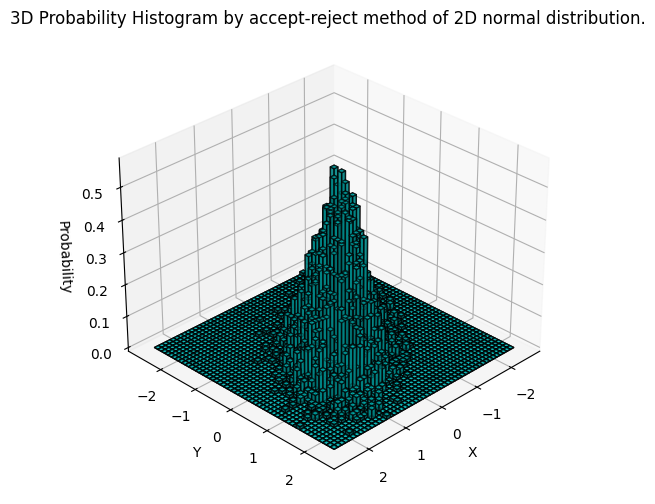

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
# Sample data: List of tuples (x, y)
# Target Bivariate Normal Distribution Parameters
mu_x, mu_y = 0, 0  # Means
sigma_x, sigma_y = 1, 1  # Standard deviations
rho = 0.8  # Correlation coefficient

# Proposal Distribution (Independent Normal)
def proposal():
    return np.random.normal(0, 1), np.random.normal(0, 1)

# Bivariate Normal PDF
def bivariate_normal(x, y):
    z = ((x - mu_x)**2 / sigma_x**2 + (y - mu_y)**2 / sigma_y**2 - 
         2 * rho * (x - mu_x) * (y - mu_y) / (sigma_x * sigma_y))
    norm_factor = 2 * np.pi * sigma_x * sigma_y * np.sqrt(1 - rho**2)
    return np.exp(-z / (2 * (1 - rho**2))) / norm_factor

# Accept-Reject Sampling
M = 1.5  # Chosen upper bound for f(x, y) / g(x, y)
n_samples = 10000
samples = []

while len(samples) < n_samples:
    x, y = proposal()
    u = np.random.uniform(0, 1)
    if u < bivariate_normal(x, y) / (M * (1 / (2 * np.pi))):
        samples.append((x, y))

samples = np.array(samples)

x_vals, y_vals = samples[:, 0], samples[:, 1]  # Unpack x and y values

# Define histogram bins
bins = 50  # Number of bins in each dimension
hist, x_edges, y_edges = np.histogram2d(x_vals, y_vals, bins=bins, density=True)  # Normalize to probability

# Prepare 3D bar positions
x_pos, y_pos = np.meshgrid(x_edges[:-1], y_edges[:-1], indexing="ij")
x_pos = x_pos.ravel()
y_pos = y_pos.ravel()
z_pos = np.zeros_like(x_pos)

# Bar dimensions
dx = dy = (x_edges[1] - x_edges[0]) * np.ones_like(z_pos)
dz = hist.ravel()  # Heights (probability)

# Create 3D figure
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot 3D probability histogram
ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz, color='cyan', alpha=0.7, edgecolor='black')

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Probability')
ax.set_title('3D Probability Histogram by accept-reject method of 2D normal distribution.')

# Adjusting view angle for better visualization
ax.view_init(elev=30, azim=45)

plt.show()